# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import time
start=time.time()

In [2]:
df=pd.read_csv("bank-additional-full.csv",sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
numeric_columns=list(df.select_dtypes(include=np.number))
categorical_columns=list(set(df.columns)-set(numeric_columns)-set('y'))
categorical_columns

['job',
 'loan',
 'day_of_week',
 'contact',
 'housing',
 'marital',
 'poutcome',
 'default',
 'education',
 'month']

In [4]:
unknowns=[]
for i in categorical_columns:
    if "unknown" in df[i].unique():
        unknowns.append(i)
unknowns

['job', 'loan', 'housing', 'marital', 'default', 'education']

In [5]:
ordered_features = ['education', 'housing', 'loan', 'contact','month', 'day_of_week','poutcome']
unordered_variables=['job','marital']

# Splitting of Training set and test set

In [6]:
X = df.iloc[:, 0:20]
y = df.iloc[:, 20]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()
X_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32884,57,technician,married,high.school,no,no,yes,cellular,may,mon,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
3169,55,unknown,married,unknown,unknown,yes,no,telephone,may,thu,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
32206,33,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
9403,36,admin.,married,high.school,no,no,no,telephone,jun,fri,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
14020,27,housemaid,married,high.school,no,yes,no,cellular,jul,fri,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


# Histograms of numerical variable

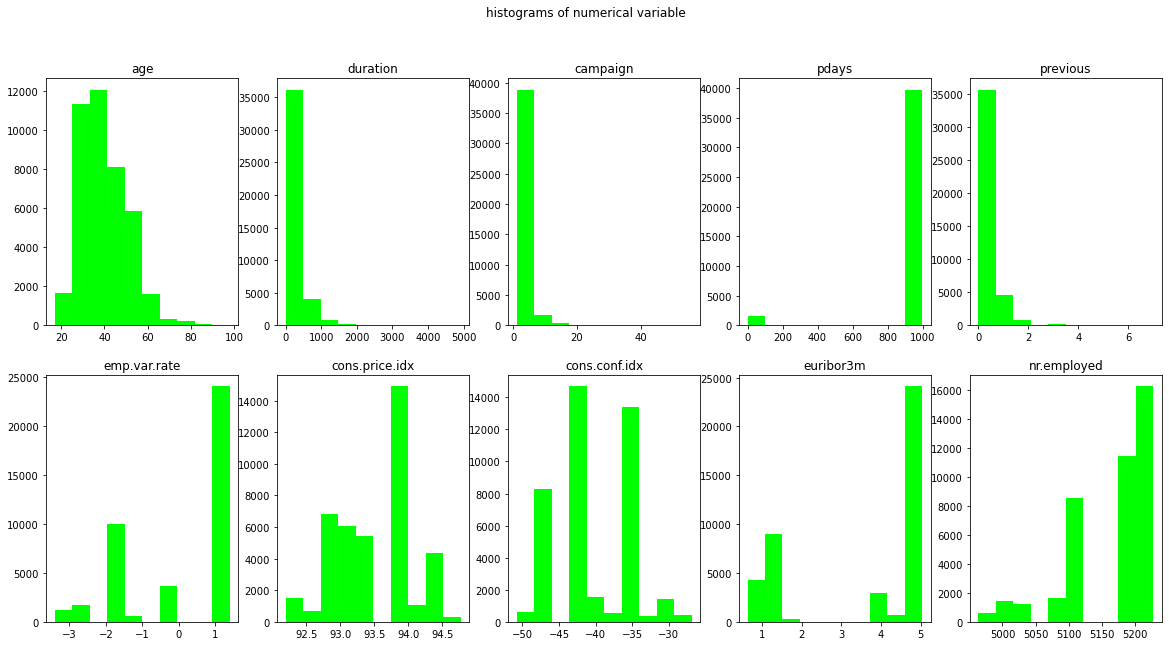

In [8]:
fig , axis = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('histograms of numerical variable')
i=0
for x in numeric_columns:
    axis[i//5,i%5].hist(df[x],color='lime')
    axis[i//5,i%5].set_title(x)
    i=i+1
plt.show()

# Removing outliers 

since the columns 'campaign','duration','previous' have some outliers, we are replacing those outliers with corresponding mean values

In [9]:
cam_mean = X_train['campaign'].mean()
X_train.loc[X_train['campaign'] > 20, 'campaign'] = cam_mean 
dur_mean = X_train['duration'].mean()
X_train.loc[X_train['duration'] > 1500, 'duration'] = cam_mean
prev_mean=X_train['previous'].mean()
X_train.loc[X_train['previous']>3,'previous']=prev_mean

C:\Users\ritir\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


# Normalizing numerical variables

In [10]:
min_max_scaling = MinMaxScaler()
min_max_scaling.fit(X_train[numeric_columns])
X_train[numeric_columns] = min_max_scaling.transform(X_train[numeric_columns])
X_test[numeric_columns] = min_max_scaling.transform(X_test[numeric_columns])

C:\Users\ritir\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\ritir\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [11]:
for feat in ['default','pdays']:
    del(X_train[feat])
for feat in ['default','pdays']:    
    del(X_test[feat])

# Labelling categorical unordered variables using get_dummies

In [12]:
X_train=pd.get_dummies(X_train,columns=['month','marital','housing','contact','loan','day_of_week','poutcome','job','education'])
X_test=pd.get_dummies(X_test,columns=['month','marital','housing','contact','loan','day_of_week','poutcome','job','education'])

In [13]:
len(X_train.columns)

59

# Fitting the data in GaussianNB()

In [14]:
X_train.head

<bound method NDFrame.head of             age  duration  campaign  previous  emp.var.rate  cons.price.idx  \
39075  0.148148  0.051333  0.105263  0.333333      0.083333        0.199532   
34855  0.148148  0.008000  0.157895  0.000000      0.333333        0.269680   
7107   0.345679  0.184667  0.052632  0.000000      0.937500        0.698753   
31614  0.209877  0.046667  0.000000  0.333333      0.333333        0.269680   
34878  0.185185  0.787333  0.421053  0.000000      0.333333        0.269680   
...         ...       ...       ...       ...           ...             ...   
6265   0.506173  0.284667  0.052632  0.000000      0.937500        0.698753   
11284  0.246914  0.192000  0.000000  0.000000      1.000000        0.882307   
38158  0.222222  0.129333  0.000000  0.333333      0.000000        0.089634   
860    0.283951  0.196667  0.052632  0.000000      0.937500        0.698753   
15795  0.148148  0.222000  0.052632  0.000000      1.000000        0.669135   

       cons.conf.idx 

In [15]:
%load_ext memory_profiler
from memory_profiler import profile
gaussian_nb = GaussianNB()
%memit gaussian_nb.fit(X_train,y_train)
y_pred = gaussian_nb.predict(X_test)
gaussian_predicted_prob_test = gaussian_nb.predict_proba(X_test)


peak memory: 204.02 MiB, increment: 23.69 MiB


In [16]:
gaussian_predicted_prob_test


array([[7.15998689e-01, 2.84001311e-01],
       [1.00000000e+00, 9.46891061e-12],
       [9.95657534e-01, 4.34246639e-03],
       ...,
       [9.99999994e-01, 5.84968149e-09],
       [9.99998808e-01, 1.19175939e-06],
       [9.94353559e-01, 5.64644058e-03]])

# Performance Measure

In [17]:
accuracy_score =accuracy_score(y_test, y_pred)
print(accuracy_score*100,'%')

86.38018936635106 %


In [18]:
from sklearn.metrics import f1_score
F1_score=f1_score(y_test, y_pred,average='weighted')
print(F1_score*100,'%')

87.14923722724303 %


In [19]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test,y_pred, labels=['no','yes'])
con_matrix

array([[9914, 1054],
       [ 629,  760]], dtype=int64)

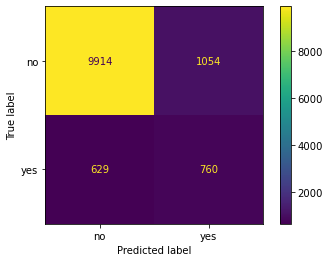

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gaussian_nb,X_test,y_test,display_labels=['no','yes'])
plt.savefig("naive_bayes_confusion_matrix")
plt.close(fig)

In [21]:
end=time.time()
end-start

2.237966775894165